<a href="https://colab.research.google.com/github/VLADpit/MyGoogleColab/blob/main/sales_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

In [ ]:
train = pd.read_parquet("train.parquet")
test = pd.read_parquet("test.parquet")
sub = pd.read_csv("sample_submission.csv")

print("train:", train.shape)
print("test:", test.shape)
print("sub:", sub.shape)
print("\ntrain columns:", list(train.columns))
print("test columns:", list(test.columns))
print("sub columns:", list(sub.columns))

train: (309648, 6)
test: (12856, 5)
sub: (12856, 3)

train columns: ['nm_id', 'dt', 'qty', 'price', 'is_promo', 'prev_leftovers']
test columns: ['nm_id', 'dt', 'price', 'is_promo', 'prev_leftovers']
sub columns: ['nm_id', 'dt', 'qty']


In [ ]:
train

,nm_id,dt,qty,price,is_promo,prev_leftovers
0,015ecac1-0d4d-4272-9f9c-7c62a742a679,2024-07-04,0,2940,0,54
1,02790618-93a6-4a2e-92e2-72cbb0bf24cf,2024-07-04,3,6543,0,75
2,03cf7d0c-4709-409d-a964-44558ada7e3d,2024-07-04,3,4983,0,66
3,0407f293-33e5-4c34-8236-9ddef5a166f0,2024-07-04,3,1971,1,132
4,046336e9-58cd-4d0f-b521-c70607fd9ec4,2024-07-04,0,2133,1,87
...,...,...,...,...,...,...
309643,fe889206-2bfe-4c6e-98c5-88ebfae5295f,2025-07-07,0,3747,1,12
309644,fef549dd-9fe5-4cf2-b9f0-2539c103a4f2,2025-07-07,0,10647,1,36
309645,ff0d747b-bdc1-4628-8163-8fcc27eed4bc,2025-07-07,0,10248,0,78
309646,ff518e5b-e28f-41f9-9610-bf9f6bdbe334,2025-07-07,0,39762,1,105


In [ ]:
test

,nm_id,dt,price,is_promo,prev_leftovers
0,0045b02f-cd56-4d2f-9d03-c5f40f1da697,2025-07-08,15927,1,540
1,0082ae57-7d24-4d43-b743-3abbd590c5aa,2025-07-08,13275,0,15
2,00b4b259-c2d5-4122-888a-43a0087fc5f5,2025-07-08,23856,1,51
3,00d0ffa6-c650-4ddf-9e69-4200ed4e2554,2025-07-08,7590,1,150
4,00d951b5-ae02-4774-a408-1b98200b1577,2025-07-08,8757,1,15
...,...,...,...,...,...
12851,fe44ffe3-9dcd-4f36-b212-a0f7f35776d9,2025-07-21,8727,1,12
12852,fef549dd-9fe5-4cf2-b9f0-2539c103a4f2,2025-07-21,10362,1,36
12853,ff0d747b-bdc1-4628-8163-8fcc27eed4bc,2025-07-21,8727,0,84
12854,ff518e5b-e28f-41f9-9610-bf9f6bdbe334,2025-07-21,40302,1,102


In [ ]:
sub

,nm_id,dt,qty
0,0045b02f-cd56-4d2f-9d03-c5f40f1da697,2025-07-08,0
1,0082ae57-7d24-4d43-b743-3abbd590c5aa,2025-07-08,0
2,00b4b259-c2d5-4122-888a-43a0087fc5f5,2025-07-08,0
3,00d0ffa6-c650-4ddf-9e69-4200ed4e2554,2025-07-08,0
4,00d951b5-ae02-4774-a408-1b98200b1577,2025-07-08,0
...,...,...,...
12851,fe44ffe3-9dcd-4f36-b212-a0f7f35776d9,2025-07-21,0
12852,fef549dd-9fe5-4cf2-b9f0-2539c103a4f2,2025-07-21,0
12853,ff0d747b-bdc1-4628-8163-8fcc27eed4bc,2025-07-21,0
12854,ff518e5b-e28f-41f9-9610-bf9f6bdbe334,2025-07-21,0


In [ ]:
print("date range")
print("train:", train["dt"].min(), "->", train["dt"].max())
print("test:", test["dt"].min(), "->", test["dt"].max())
print("sub:", sub["dt"].min(), "->", sub["dt"].max())

date range
train: 2024-07-04 00:00:00 -> 2025-07-07 00:00:00
test: 2025-07-08 00:00:00 -> 2025-07-21 00:00:00
sub: 2025-07-08 00:00:00 -> 2025-07-21 00:00:00


In [ ]:
# приводим dt к datetime
for df_name, df in [("train", train), ("test", test), ("sub", sub)]:
    if "dt" in df.columns:
        df["dt"] = pd.to_datetime(df["dt"])
    else:
        raise ValueError(f"В {df_name} нет колонки dt")

In [ ]:
print("dtypes(train)")
print(train.dtypes)

dtypes(train)
nm_id                     object
dt                datetime64[ns]
qty                        int64
price                      int64
is_promo                   int64
prev_leftovers             int64
dtype: object


In [ ]:
print("missing(train) top")
print(train.isna().mean().sort_values(ascending=False).head(20))

missing(train) top
nm_id             0.0
dt                0.0
qty               0.0
price             0.0
is_promo          0.0
prev_leftovers    0.0
dtype: float64


In [ ]:
# в таких задачах часто есть дубли nm_id+dt (например, несколько складов/каналов)
if {"nm_id", "dt", "qty"}.issubset(train.columns):
    dup_cnt = train.duplicated(["nm_id", "dt"]).sum()
    print(f"Duplicates by (nm_id, dt): {dup_cnt}")

Duplicates by (nm_id, dt): 0


In [ ]:
print("cardinalities")
print("nm_id unique train:", train["nm_id"].nunique())
print("nm_id unique test:", test["nm_id"].nunique() if "nm_id" in test.columns else "no nm_id column")
print("nm_id unique sub:", sub["nm_id"].nunique())

cardinalities
nm_id unique train: 2743
nm_id unique test: 949
nm_id unique sub: 949


In [ ]:
# sparsity / zeros
zero_share = (train["qty"] == 0).mean()
print("zero share (train):", round(float(zero_share), 4))
print("qty summary:\n", train["qty"].describe(percentiles=[.5, .75, .9, .95, .99]))

zero share (train): 0.8708
qty summary:
 count    309648.000000
mean          0.845906
std           4.888326
min           0.000000
50%           0.000000
75%           0.000000
90%           3.000000
95%           3.000000
99%          12.000000
max         294.000000
Name: qty, dtype: float64


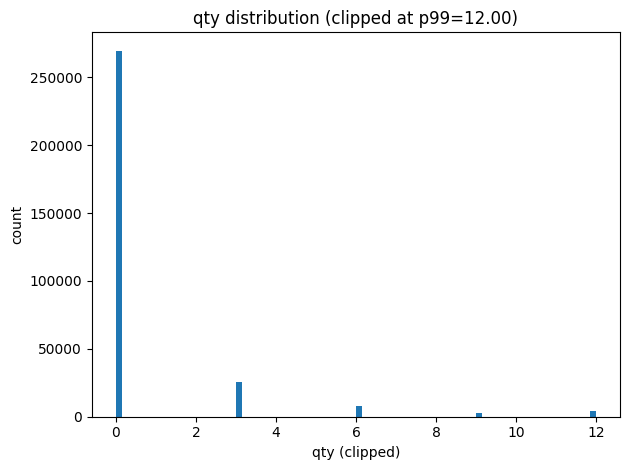

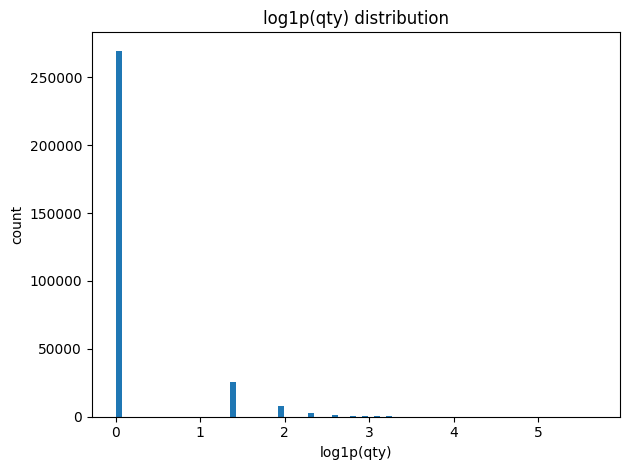

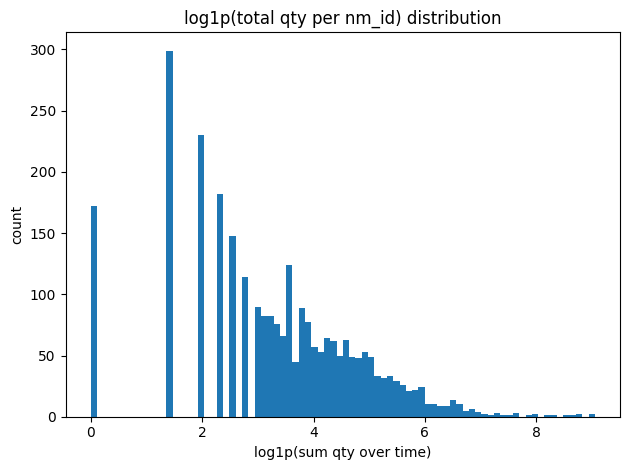

In [ ]:
# Histogram of qty
y = train["qty"].astype(float).to_numpy()
p99 = np.quantile(y, 0.99) if len(y) else 0
cap = max(10, p99)
y_cap = np.clip(y, 0, cap)

plt.figure()
plt.hist(y_cap, bins=80)
plt.title(f"qty distribution (clipped at p99={p99:.2f})")
plt.xlabel("qty (clipped)")
plt.ylabel("count")
plt.tight_layout()
plt.show()

# Histogram of log1p(qty)
plt.figure()
plt.hist(np.log1p(y), bins=80)
plt.title("log1p(qty) distribution")
plt.xlabel("log1p(qty)")
plt.ylabel("count")
plt.tight_layout()
plt.show()

# Distribution of total sales per nm_id (sum over time)
nm_tot = train.groupby("nm_id")["qty"].sum().astype(float)
plt.figure()
plt.hist(np.log1p(nm_tot.to_numpy()), bins=80)
plt.title("log1p(total qty per nm_id) distribution")
plt.xlabel("log1p(sum qty over time)")
plt.ylabel("count")
plt.tight_layout()
plt.show()

**Что видно?**

1. **Сильная нулевая инфляция**

   На `qty` и `log1p(qty)` почти вся масса в нуле, а значит, модель, которая часто говорит 0, будет выглядеть неплохо по обычной MAE, но по нашей wMAE (вес 7 на `y>0`) ошибки на днях с продажами будут больнее.

2. **Дискретные шипы**

   На clipped-гистограмме p99=12 видно, что положительные продажи в основном маленькие целые значения (3, 6, 9, 12 - похоже на кратности упаковки/партии, или всегда продается пачкой).

3. **По nm_id - тяжёлый хвост**

   `log1p(total qty per nm_id)` показывает: много товаров с очень маленьким суммарным объемом, и небольшой хвост хитов.


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

rng = np.random.default_rng(42)
unique_ids = train["nm_id"].dropna().unique()
k = min(10, len(unique_ids))
random_ids = rng.choice(unique_ids, size=k, replace=False)

for nm in random_ids:
    df = train[train["nm_id"] == nm].sort_values("dt")

    # левая ось
    fig.add_trace(
        go.Scatter(
            x=df["dt"], y=df["qty"],
            mode="lines",
            name=f"qty {nm}",
            yaxis="y1",
        )
    )

    # правая ось
    fig.add_trace(
        go.Scatter(
            x=df["dt"], y=df["price"],
            mode="lines",
            name=f"price {nm}",
            yaxis="y2",
        )
    )

fig.update_layout(
    yaxis=dict(title="Количество (qty)"),
    yaxis2=dict(title="Цена (price)", overlaying="y", side="right"),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="left", x=0),
    height=650,
)

fig.show()

In [ ]:
# seasonal naive by day-of-week
# медиана qty по каждому (nm_id, dow) за последние window_days)

def fit_dow_median_baseline(train_df: pd.DataFrame, window_days: int = 56):
    """
    Возвращает словари-lookup для прогнозов:
      - median qty per (nm_id, dow)
      - median qty per nm_id
      - global median
    Используем только последние window_days от конца train_df.
    """
    df = train_df[["nm_id", "dt", "qty"]].copy()
    df["dt"] = pd.to_datetime(df["dt"])
    max_dt = df["dt"].max()
    start_dt = max_dt - pd.Timedelta(days=window_days)

    df_w = df[df["dt"] >= start_dt].copy()
    df_w["dow"] = df_w["dt"].dt.dayofweek

    nm_dow_med = df_w.groupby(["nm_id", "dow"])["qty"].median()
    nm_med = df_w.groupby("nm_id")["qty"].median()
    global_med = float(df_w["qty"].median())

    state = {
        "nm_dow_med": nm_dow_med,
        "nm_med": nm_med,
        "global_med": global_med,
        "max_dt": max_dt,
        "window_days": window_days,
    }
    return state


def predict_dow_median(df_future: pd.DataFrame, state) -> np.ndarray:
    """
    df_future должен содержать: nm_id, dt
    """
    fut = df_future[["nm_id", "dt"]].copy()
    fut["dt"] = pd.to_datetime(fut["dt"])
    fut["dow"] = fut["dt"].dt.dayofweek

    nm_dow_med = state["nm_dow_med"]
    nm_med = state["nm_med"]
    global_med = state["global_med"]

    # map (nm_id, dow) -> median
    idx = pd.MultiIndex.from_frame(fut[["nm_id", "dow"]])
    pred = nm_dow_med.reindex(idx).to_numpy()

    # qty должен быть неотрицательный
    pred = np.clip(pred, 0, None)

    # обычно qty - целое
    pred = np.rint(pred).astype(int)
    return pred

In [ ]:
def mae(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    return float(np.mean(np.abs(y_true - y_pred)))

def wmae(y_true, y_pred, w_pos=7.0):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    w = np.where(y_true > 0, w_pos, 1.0)
    return float(np.sum(w * np.abs(y_true - y_pred)) / np.sum(w))

def smape(y_true, y_pred, eps=1e-9):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    denom = np.maximum(np.abs(y_true) + np.abs(y_pred), eps)
    return float(2.0 * np.mean(np.abs(y_pred - y_true) / denom))

In [ ]:
max_dt = train["dt"].max()
val_days = 14
cutoff = max_dt - pd.Timedelta(days=val_days)

train_tr = train[train["dt"] <= cutoff].copy()
train_val = train[train["dt"] > cutoff].copy()

state = fit_dow_median_baseline(train_tr, window_days=56)
val_pred = predict_dow_median(train_val[["nm_id", "dt"]], state)

y_true = train_val["qty"].to_numpy()
y_pred = val_pred

m_mae = mae(y_true, y_pred)
m_wmae = wmae(y_true, y_pred, w_pos=7)
m_smape = smape(y_true, y_pred)

print("Baseline validation")
print("cutoff:", cutoff.date(), "| val_days:", val_days)
print("MAE:", round(m_mae, 4))
print("wMAE:", round(m_wmae, 4))
print("sMAPE:", round(m_smape, 6))

Baseline validation
cutoff: 2025-06-23 | val_days: 14
MAE: 1.2698
wMAE: 3.9274
sMAPE: 0.302882


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
state_full = fit_dow_median_baseline(train, window_days=56)
sub_pred = predict_dow_median(sub[["nm_id", "dt"]], state_full)

submission = sub.copy()
submission["qty"] = sub_pred

assert submission.shape[0] == sub.shape[0]
assert list(submission.columns) == ["nm_id", "dt", "qty"]

In [ ]:
out_path = "submission_baseline_median.csv"
submission.to_csv(out_path, index=False)
print(out_path)
print(submission.head(10))

submission_baseline_median.csv
                                  nm_id         dt  qty
0  0045b02f-cd56-4d2f-9d03-c5f40f1da697 2025-07-08    0
1  0082ae57-7d24-4d43-b743-3abbd590c5aa 2025-07-08    0
2  00b4b259-c2d5-4122-888a-43a0087fc5f5 2025-07-08    0
3  00d0ffa6-c650-4ddf-9e69-4200ed4e2554 2025-07-08    0
4  00d951b5-ae02-4774-a408-1b98200b1577 2025-07-08    0
5  0106ee9e-0af4-48ef-90cb-e80808020872 2025-07-08    0
6  0132134f-7063-4b66-a555-2cdd83e63c56 2025-07-08    0
7  01898b6a-31ea-4aa1-a13d-c7db8ee2c709 2025-07-08    0
8  01de990c-9a97-4b05-ab23-4ebc85b9c803 2025-07-08    0
9  01e34721-677f-4300-95e2-c965efdd1290 2025-07-08    0
